# **DATA NORMALIZATION TECHNIQUE**

#### IMPORT REQUIRED LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### LOAD DATASET

In [5]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

In [ ]:
df.head()

#### HANDLING DUPLICATES

In [7]:
print(f"Number of duplicates: {df.duplicated().sum()}")

df.drop_duplicates(subset="ResponseId", inplace=True)

print(f"Number of duplicates after removed: {df.duplicated().sum()}")

Number of duplicates: 20
Number of duplicates after removed: 0


------

#### HANDLING MISSING VALUES

Identify missing values in `CodingActivities`

In [16]:
# Count missing values
print(f"Number of missing Coding Activities: {df['CodingActivities'].isna().sum()}")

# Let's fill it with place holder ('Unknown')
df['CodingActivities'].fillna('Unknown', inplace=True)

print(f"Number of missing Coding Activities after imputing: {df['CodingActivities'].isna().sum()}")

Number of missing Coding Activities: 10971
Number of missing Coding Activities after imputing: 0


**NOTE**: For this type of data in `CodingActivities`, is it better to fill it with *placeholder* ('Unknown') instead of *mode* or *forward-fill*.
* **WHY?** This keeps your data honest by admitting you don't know the answer, rather than guessing.

------

#### REMOVING OUTLIERS

Identify missing values in `ConvertedCompYearly`

In [21]:
# Count missing values
print(f"Number of total rows: {len(df)}")
print(f"Number of missing Annual Compensation Data: {df['ConvertedCompYearly'].isna().sum()}")
prc = (df['ConvertedCompYearly'].isna().sum()) * 100 / len(df)
print(f"Missing values percentage: {prc:.1f}%")

Number of total rows: 65437
Number of missing Annual Compensation Data: 42002
Missing values percentage: 64.2%


Since the percentage of missing values is 64.2% which is high, i consider creating a seperate clean dataframe is a safe idea to analyze the data. I'll drop every missing values in the new dataframe, and analyze `ConvertedCompYearly` column.

In [24]:
# Create a new spesific dataframe just for annual compensation analysis
salary_df = df.dropna(subset=['ConvertedCompYearly']).copy()

print(f"New salary dataframe shape: {salary_df.shape}")
print(f"Number of missing values: {salary_df['ConvertedCompYearly'].isna().sum()}")

New salary dataframe shape: (23435, 114)
Number of missing values: 0


Now, before normalizing `ConvertedCompYearly` data, it's better to remove any outliers first so the outliers won't break the scale.

We'll use **IQR** to remove those outliers.

In [33]:
Q1 = salary_df['ConvertedCompYearly'].quantile(0.25)
Q3 = salary_df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Filter the subset
clean_salary = salary_df[(salary_df['ConvertedCompYearly'] >= (Q1 - 1.5 * IQR)) &
                         (salary_df['ConvertedCompYearly'] <= (Q3 + 1.5 * IQR))].copy()

print(f"New shape of cleaned salary dataframe: {clean_salary.shape}")

New shape of cleaned salary dataframe: (22457, 114)


----

#### NORMALIZING COMPENSATION DATA

In [38]:
# ---Normalize Values using MIN-MAX---
# Create new column 'ConvertedCompYearly_MinMax`
clean_salary['ConvertedCompYearly_MinMax'] = ((clean_salary['ConvertedCompYearly'] - clean_salary['ConvertedCompYearly'].min()) /
                                              (clean_salary['ConvertedCompYearly'].max() - clean_salary['ConvertedCompYearly'].min()))

In [39]:
# ---Apply Z-Score Normalization to `ConvertedCompYearly`
clean_salary['ConvertedCompYearly_Zscore'] = ((clean_salary['ConvertedCompYearly'] - clean_salary['ConvertedCompYearly'].mean())/
                                              clean_salary['ConvertedCompYearly'].std())

---

#### VISUALIZE DISTRIBUTION OF DATA 

Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_MinMax`, and `ConvertedCompYearly_Zscore`

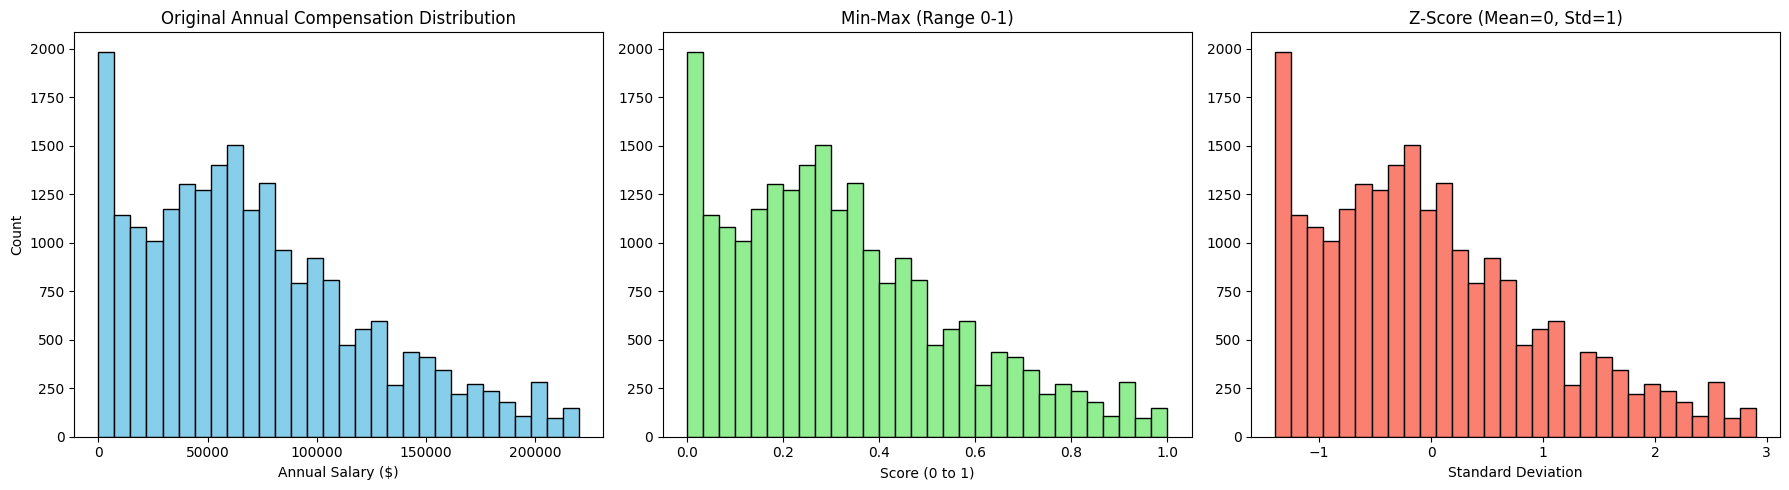

In [37]:
# Create figure with 3 subplots side-by-side
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# Plot 1: Original Distribution
axes[0].hist(clean_salary['ConvertedCompYearly'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title("Original Annual Compensation Distribution")
axes[0].set_xlabel("Annual Salary ($)")
axes[0].set_ylabel("Count")

# Plot 2: Min-Max Normalization Distribution
axes[1].hist(clean_salary['ConvertedCompYearly_MinMax'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Min-Max (Range 0-1)')
axes[1].set_xlabel('Score (0 to 1)')

# Plot 3: Z-Score Standardized
axes[2].hist(clean_salary['ConvertedCompYearly_Zscore'], bins=30, color='salmon', edgecolor='black')
axes[2].set_title('Z-Score (Mean=0, Std=1)')
axes[2].set_xlabel('Standard Deviation')

plt.tight_layout()
plt.show()

---

#### **SUMMARY**

I've practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Removing outliers with IQR method.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.